In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import xarray as xr
from MHW_daily_calcs import *
import datetime as dt

In [2]:
t=np.arange(16.0,116*24,24)/24
t.shape

(116,)

In [3]:
delt=t[1]-t[0]
alpha=1

In [4]:
delt

np.float64(1.0)

In [5]:
def windows(L):
    gwin=np.empty((len(t),len(t)))
    for ind, ti in enumerate(t):
        diff=np.abs(ti-t)
        Leff=min(L,alpha*(ti-t[0]+1)*delt,alpha*(t[-1]-ti+1)*delt)# do not smooth beginning and end as strongly
        s=Leff/2.355
        weight=np.array([np.exp(-.5*x**2/s**2) if x <=3*Leff else 0.0 for x in diff])
        gwin[ind,...]=weight
    
    twin=np.empty((len(t),len(t)))
    for ind, ti in enumerate(t):
        diff=np.abs(ti-t)
        Leff=min(L,alpha*(ti-t[0]+1)*delt,alpha*(t[-1]-ti+1)*delt)# do not smooth beginning and end as strongly
        weight=np.maximum(np.round(Leff-diff,8),0.0)
        twin[ind,...]=weight
    return gwin,twin

In [6]:
np.finfo(float).eps

np.float64(2.220446049250313e-16)

In [7]:
gwin={}
twin={}
for L in (15,3,1):
    gwin[L],twin[L]=windows(L)

In [8]:
cm=cmocean.cm.thermal
cm.set_bad('w')

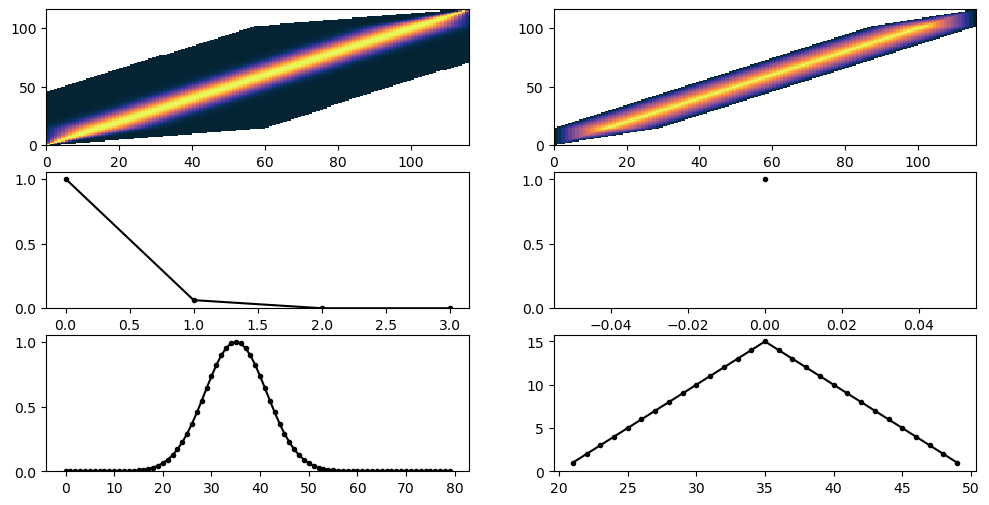

In [9]:
L=15
fig,ax=plt.subplots(3,2,figsize=(12,6))
ax[0,0].pcolormesh(np.ma.masked_where(gwin[15]==0,gwin[L]),cmap=cm)
ax[0,1].pcolormesh(np.ma.masked_where(twin[15]==0,twin[L]),cmap=cm)
ax[1,0].plot(np.ma.masked_where(gwin[15][0,...]==0,gwin[L][0,...]),'k.-')
ax[1,1].plot(np.ma.masked_where(twin[15][0,...]==0,twin[L][0,...]),'k.-');
ax[2,0].plot(np.ma.masked_where(gwin[15][35,...]==0,gwin[L][35,...]),'k.-')
ax[2,1].plot(np.ma.masked_where(twin[15][35,...]==0,twin[L][35,...]),'k.-');
for iax in (ax[1,0],ax[1,1],ax[2,0],ax[2,1]):
    lims=iax.set_ylim()
    iax.set_ylim(0,lims[1])

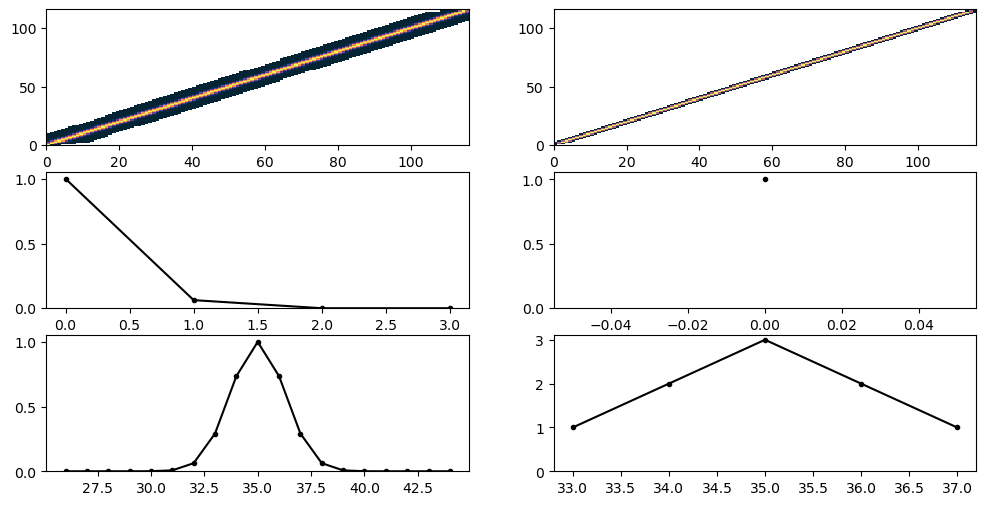

In [10]:
L=3
fig,ax=plt.subplots(3,2,figsize=(12,6))
ax[0,0].pcolormesh(np.ma.masked_where(gwin[L]==0,gwin[L]),cmap=cm)
ax[0,1].pcolormesh(np.ma.masked_where(twin[L]==0,twin[L]),cmap=cm)
ax[1,0].plot(np.ma.masked_where(gwin[L][0,...]==0,gwin[L][0,...]),'k.-')
ax[1,1].plot(np.ma.masked_where(twin[L][0,...]==0,twin[L][0,...]),'k.-');
ax[2,0].plot(np.ma.masked_where(gwin[L][35,...]==0,gwin[L][35,...]),'k.-')
ax[2,1].plot(np.ma.masked_where(twin[L][35,...]==0,twin[L][35,...]),'k.-');
for iax in (ax[1,0],ax[1,1],ax[2,0],ax[2,1]):
    lims=iax.set_ylim()
    iax.set_ylim(0,lims[1])

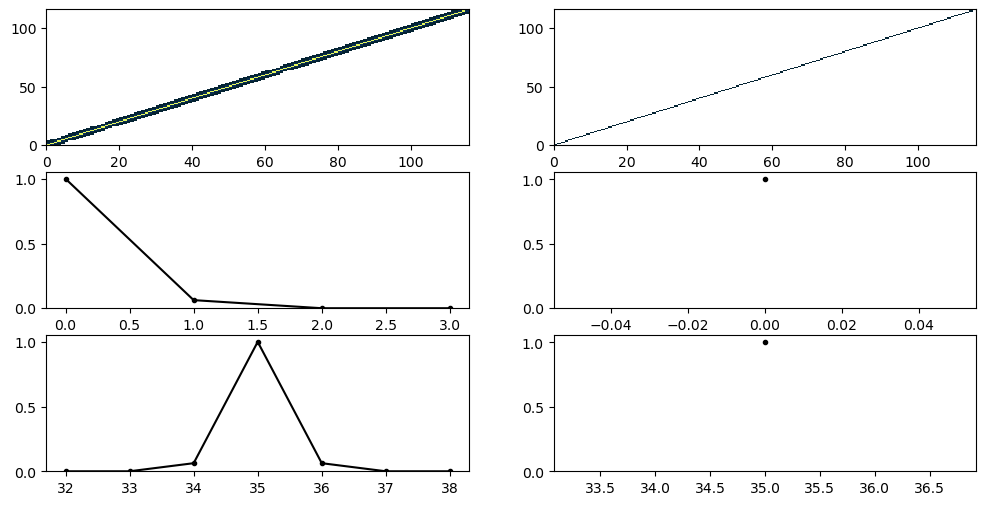

In [11]:
L=1
fig,ax=plt.subplots(3,2,figsize=(12,6))
ax[0,0].pcolormesh(np.ma.masked_where(gwin[L]==0,gwin[L]),cmap=cm)
ax[0,1].pcolormesh(np.ma.masked_where(twin[L]==0,twin[L]),cmap=cm)
ax[1,0].plot(np.ma.masked_where(gwin[L][0,...]==0,gwin[L][0,...]),'k.-')
ax[1,1].plot(np.ma.masked_where(twin[L][0,...]==0,twin[L][0,...]),'k.-');
ax[2,0].plot(np.ma.masked_where(gwin[L][35,...]==0,gwin[L][35,...]),'k.-')
ax[2,1].plot(np.ma.masked_where(twin[L][35,...]==0,twin[L][35,...]),'k.-');
for iax in (ax[1,0],ax[1,1],ax[2,0],ax[2,1]):
    lims=iax.set_ylim()
    iax.set_ylim(0,lims[1])

# check smoothed clim files

In [12]:
climyrs=[1993,2023]
qtile=0.90

In [13]:
flistclim = [fnameCanESMClimSmooth(workdir,climyrs[0],climyrs[-1],mm,'tri',10) for mm in range(1,13)]
fclim=xr.open_mfdataset(flistclim,combine='nested',concat_dim='month',parallel=True,decode_times=False)
SST=fclim.tso.data.rechunk([1,-1,90,120])

In [14]:
flistclim

['/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily//clim/clim_smooth_tri10cwao_CanESM5.1p1bc-v20240611_hindcast_C1993_2023_Mon01_ocean_1d_surface_tso.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily//clim/clim_smooth_tri10cwao_CanESM5.1p1bc-v20240611_hindcast_C1993_2023_Mon02_ocean_1d_surface_tso.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily//clim/clim_smooth_tri10cwao_CanESM5.1p1bc-v20240611_hindcast_C1993_2023_Mon03_ocean_1d_surface_tso.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily//clim/clim_smooth_tri10cwao_CanESM5.1p1bc-v20240611_hindcast_C1993_2023_Mon04_ocean_1d_surface_tso.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily//clim/clim_smooth_tri10cwao_CanESM5.1p1bc-v20240611_hindcast_C1993_2023_Mon05_ocean_1d_surface_tso.nc',
 '/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily//clim/clim_smooth_tri10cwao_CanESM5.1p1bc-v20240611_hindcast_C1993_2023_Mon06_

In [15]:
class gloc:
    def __init__(self,name,j,i):
        self.name=name
        self.j=j
        self.i=i
loc1=gloc('Equatorial Pacific',94,224)
loc2=gloc('North Atlantic',145,350)

(299.75, 302.0)

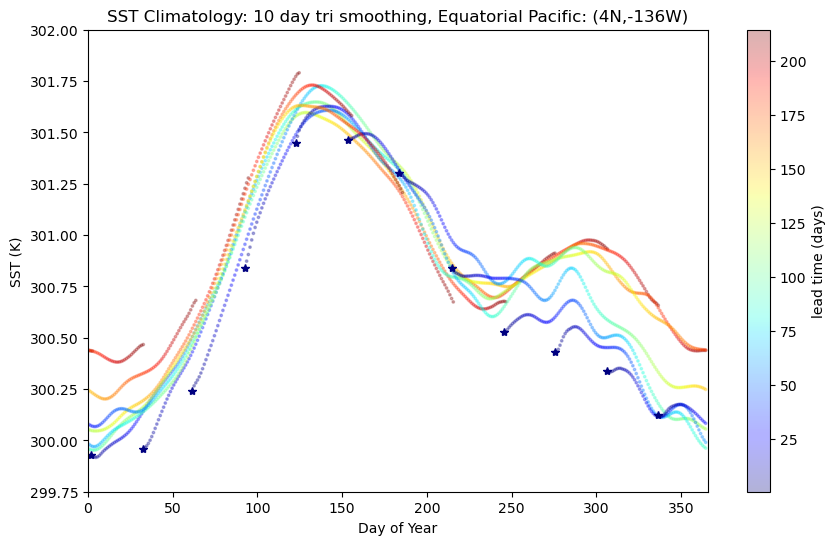

In [16]:
loc=loc1
# unsmoothed
fig,ax=plt.subplots(1,1,figsize=(10,6))
for mm in range(1,13):
    t=(dt.datetime(2024,mm,1)-dt.datetime(2023,12,31)).total_seconds()/(24*3600)+fclim.leadtime.values/24
    t=t%365
    m=ax.scatter(t,SST[mm-1,:,loc.j,loc.i],c=fclim.leadtime.values/24,s=3,cmap=plt.get_cmap('jet'),alpha=.3)
    ax.plot(t[0],SST[mm-1,0,loc.j,loc.i],'*',color='navy')
fig.colorbar(m,label='lead time (days)')
ax.set_title(f'SST Climatology: 10 day tri smoothing, {loc.name}: ({loc.j-90}N,{loc.i-360}W)')
ax.set_xlabel('Day of Year')
ax.set_ylabel('SST (K)')
ax.set_xlim(0,366)
ax.set_ylim(299.75,302)

In [17]:
fclim

<xarray.Dataset> Size: 1GB
Dimensions:   (month: 12, leadtime: 215, lat: 180, lon: 360)
Coordinates:
  * leadtime  (leadtime) float64 2kB 15.0 39.0 63.0 ... 5.127e+03 5.151e+03
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: month
Data variables:
    tso       (month, leadtime, lat, lon) float64 1GB dask.array<chunksize=(1, 215, 180, 360), meta=np.ndarray>

In [18]:
fclim.close()